Data overview of Amazon e-commerce dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

In [8]:
df = pd.read_csv("../Data/Raw/Amazon Sale Report.csv", low_memory=False) #collumn 23 has mixed types

In [9]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [13]:
df['Unnamed: 22'].unique()

array([nan, False], dtype=object)

In [14]:
df['Unnamed: 22'].isna().sum()

np.int64(49050)

<Axes: >

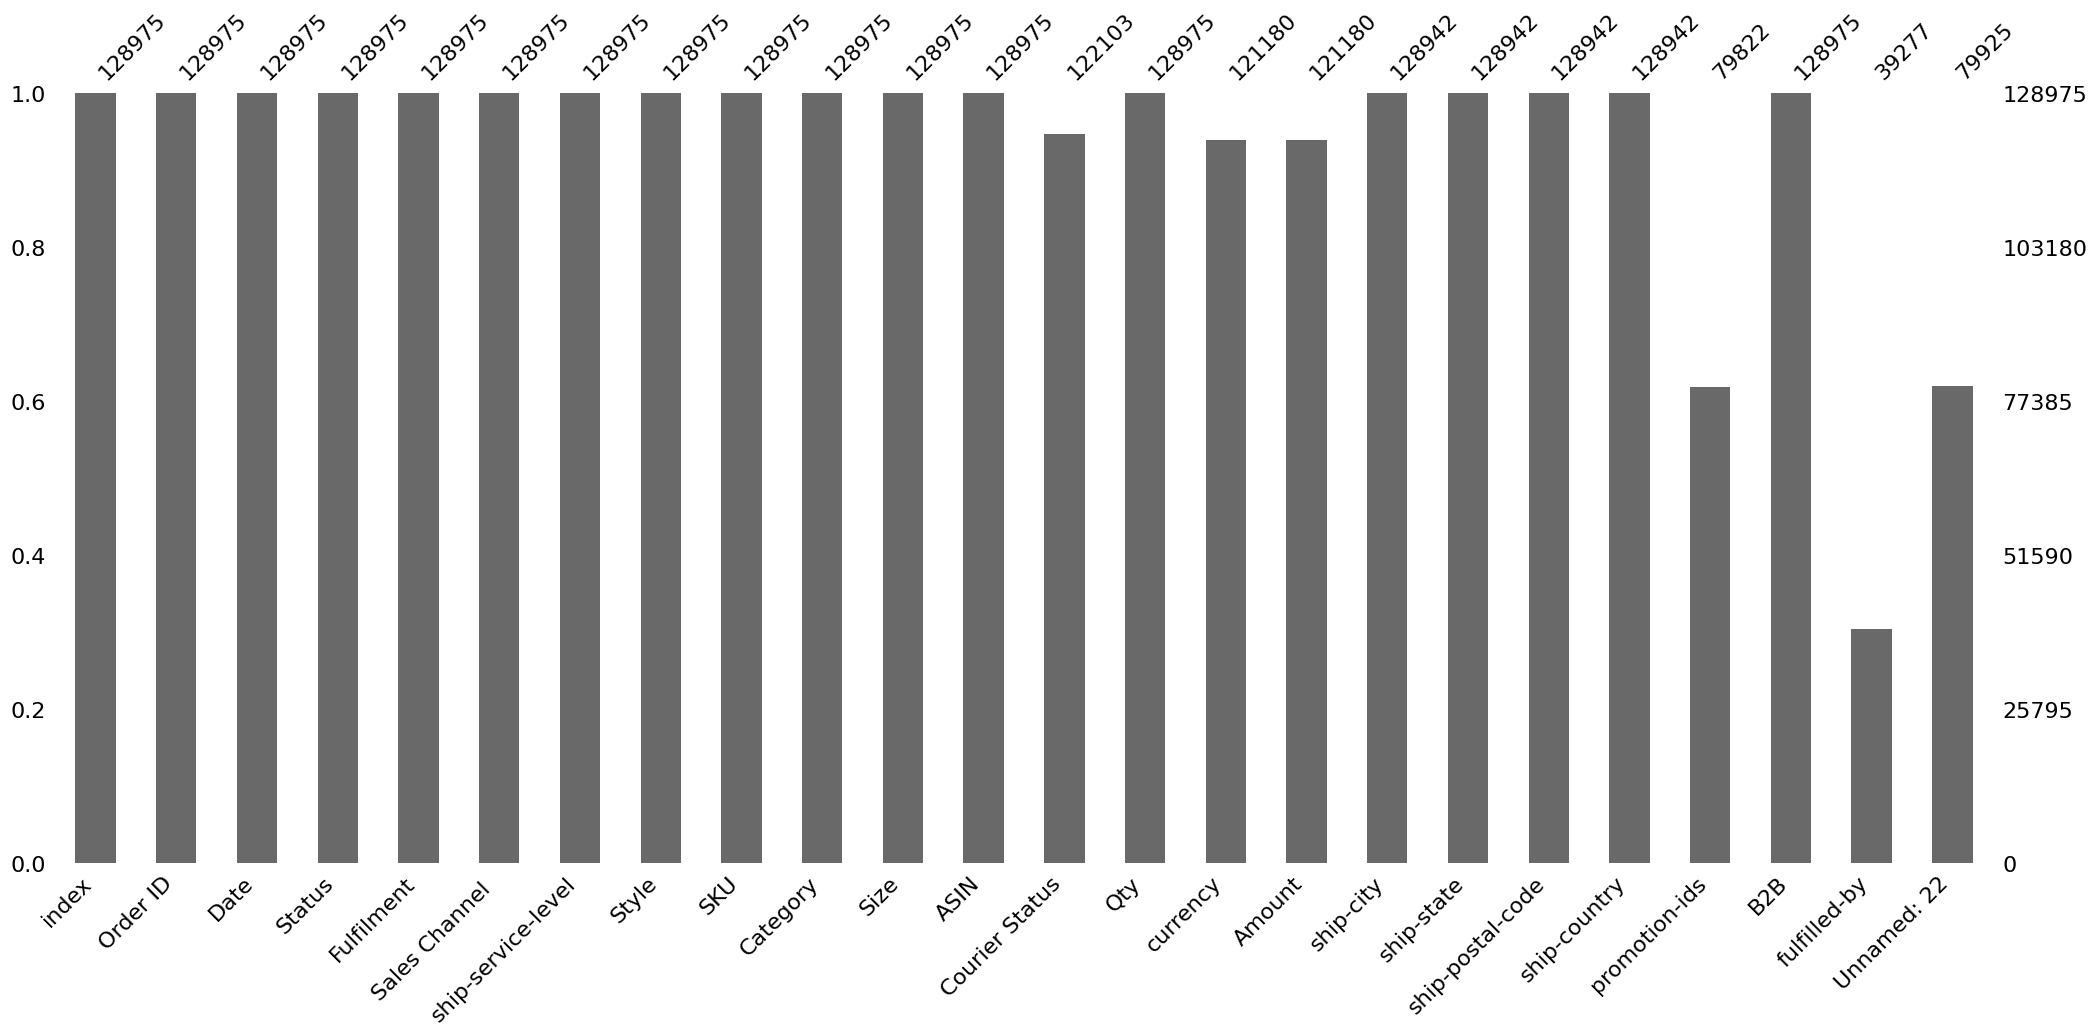

In [15]:
msn.bar(df)

<Axes: >

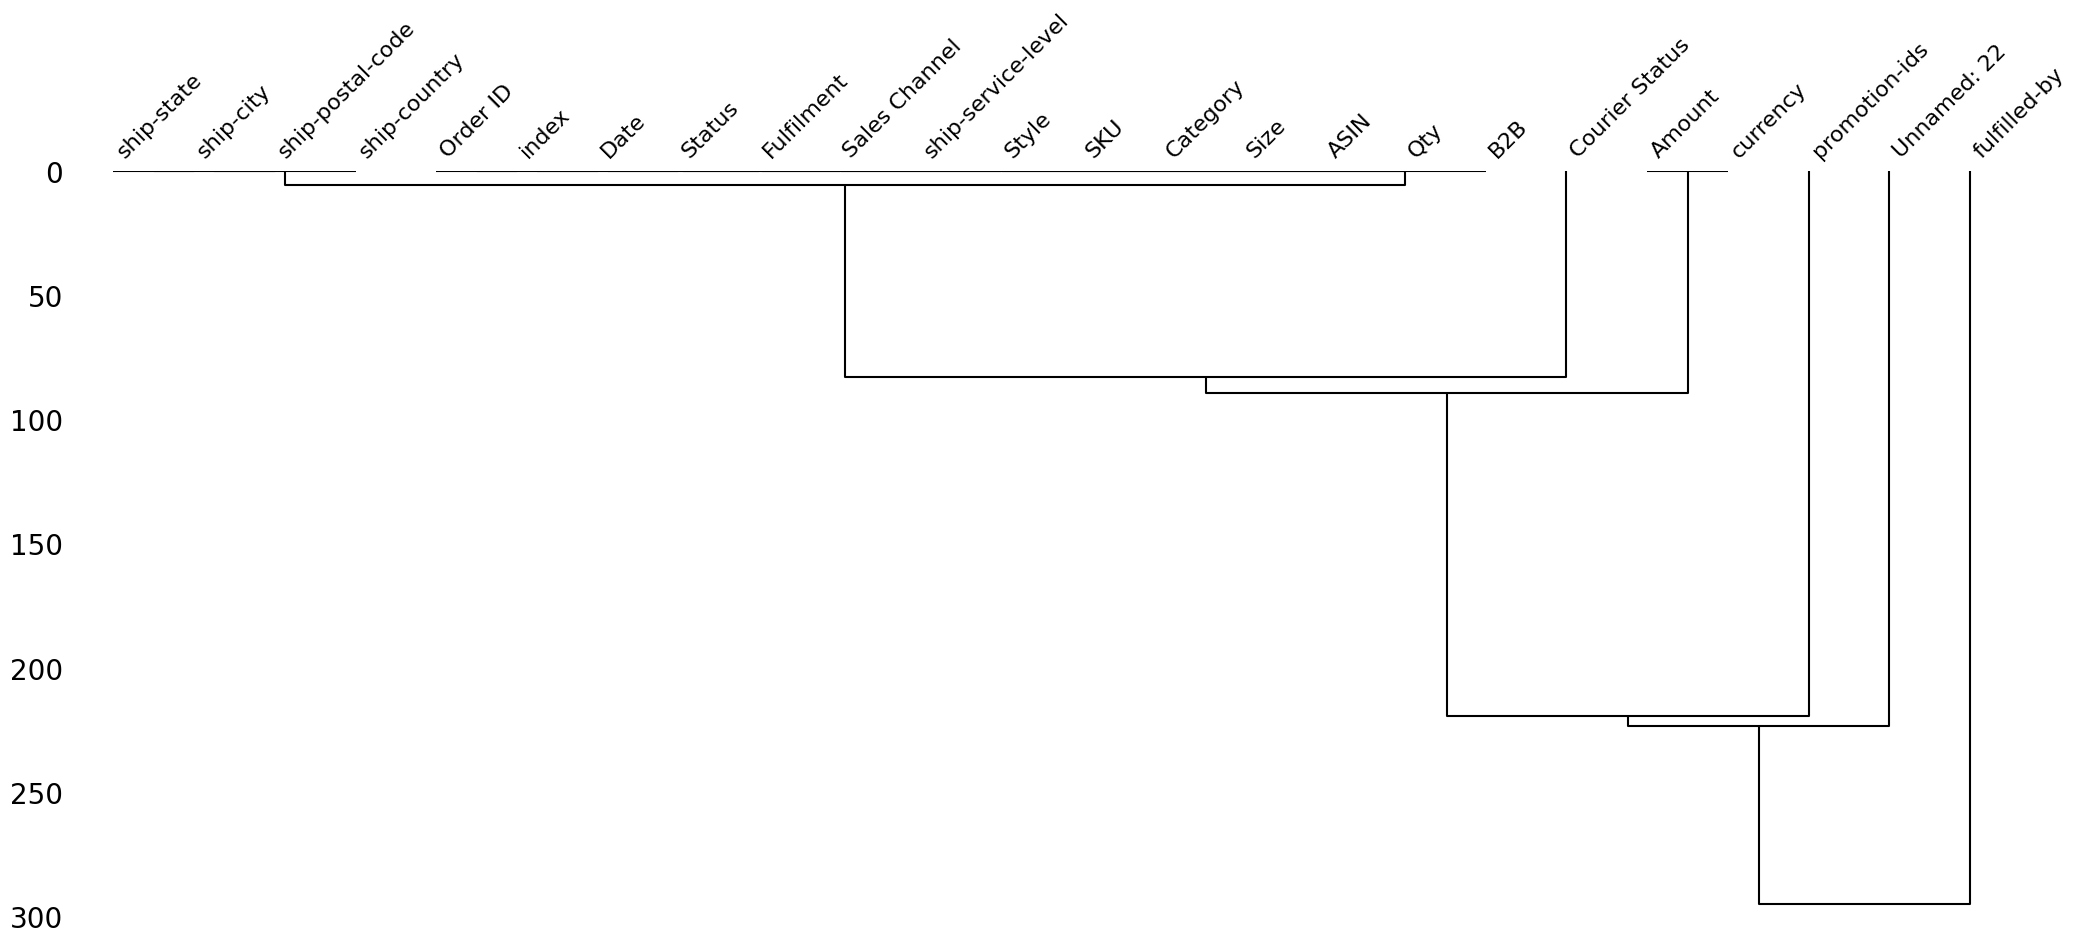

In [16]:
msn.dendrogram(df)

<Axes: >

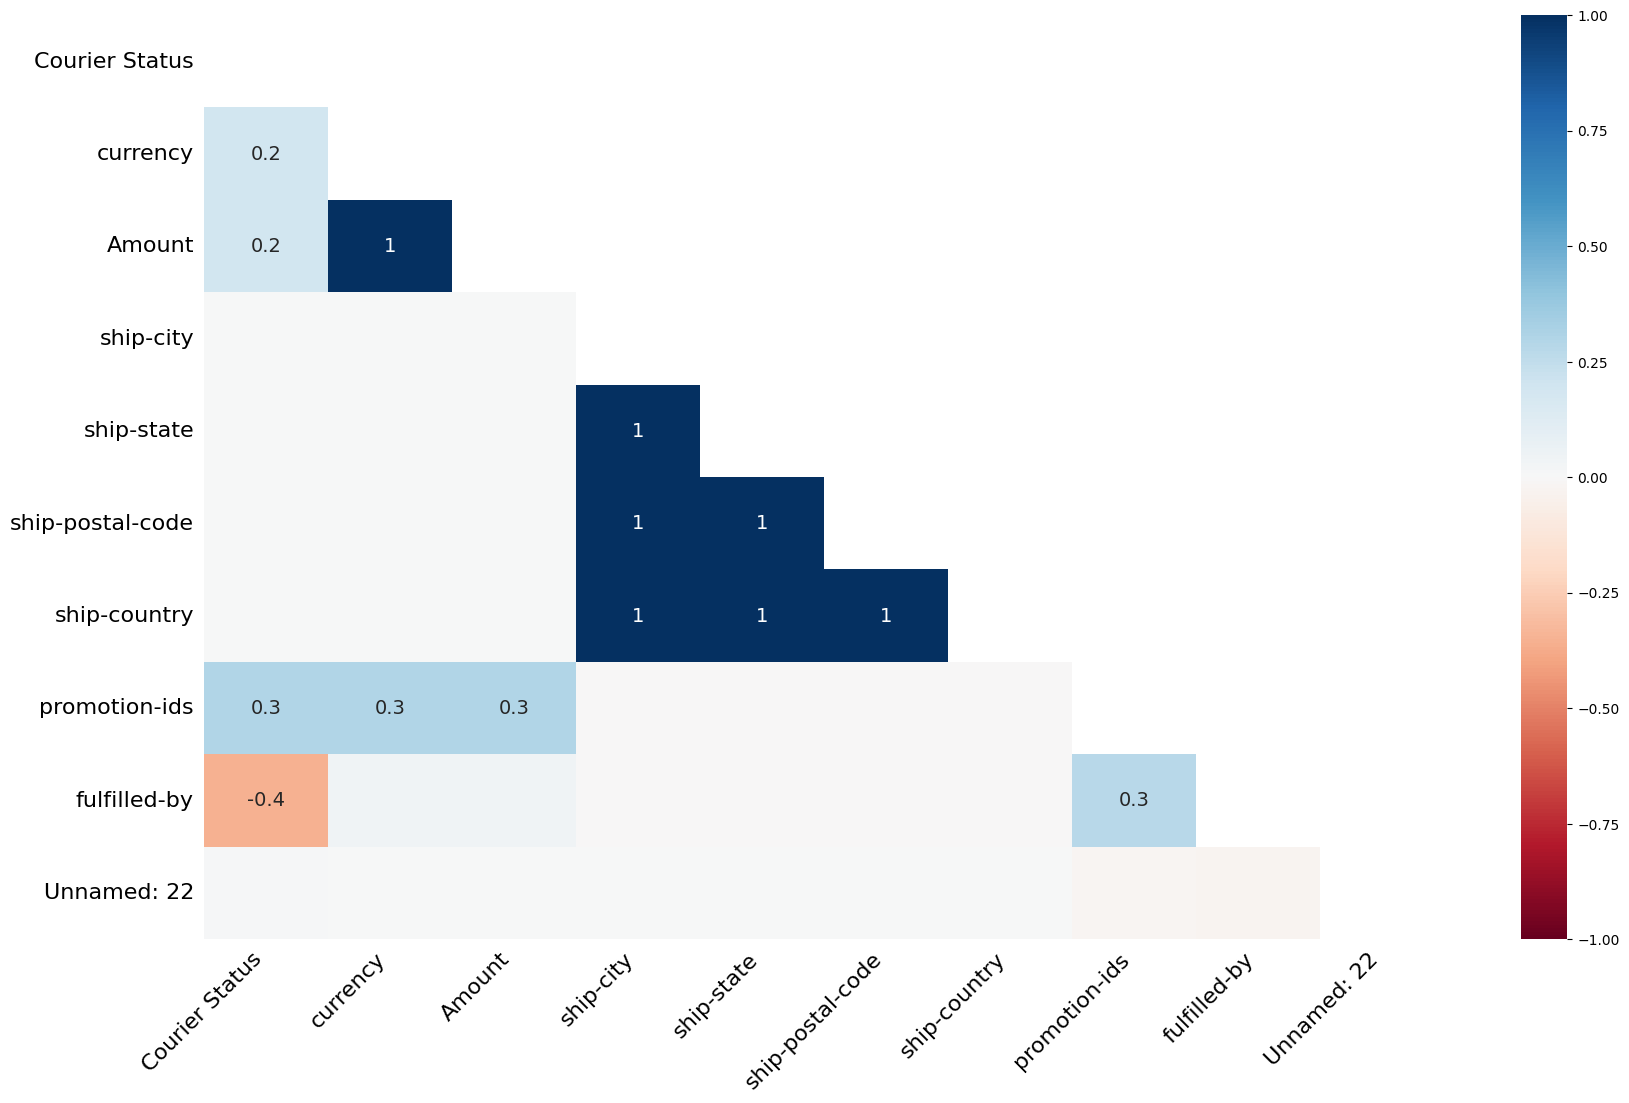

In [17]:
msn.heatmap(df)

<Axes: >

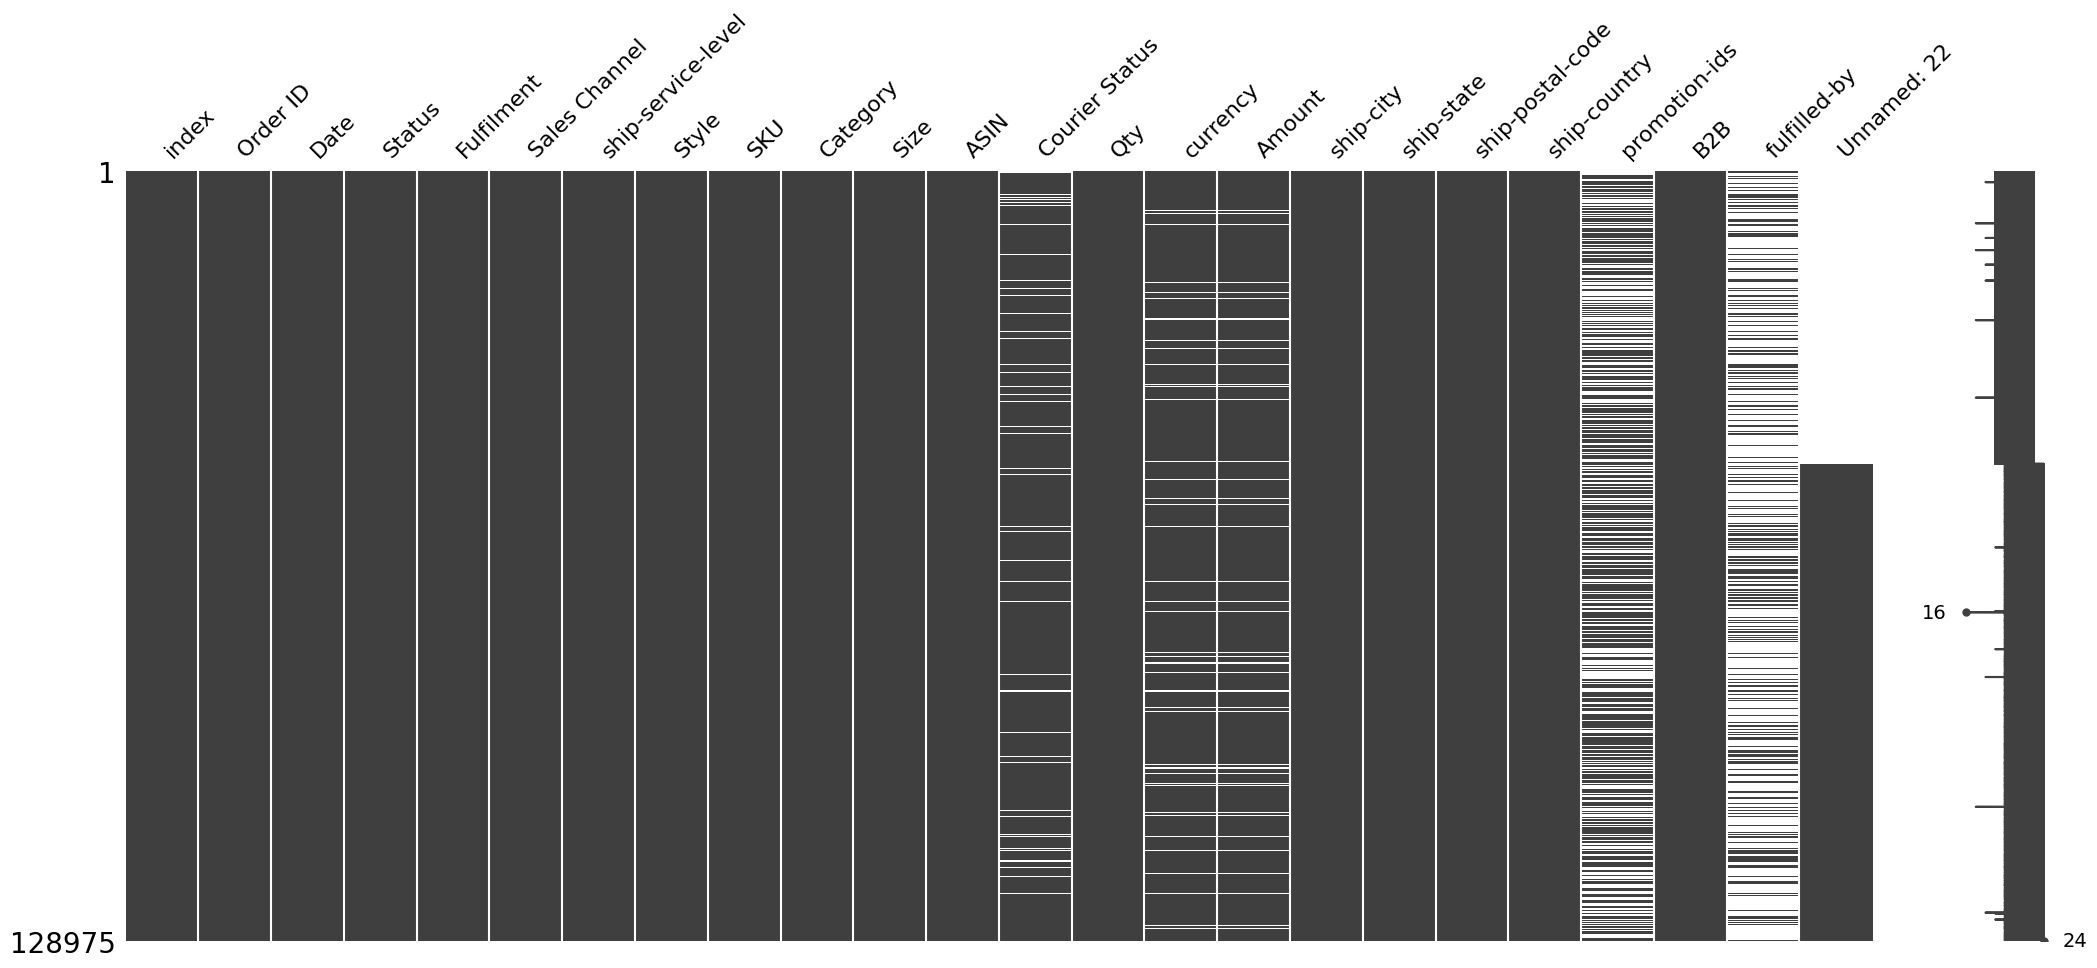

In [18]:
msn.matrix(df)

In [20]:
df['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [23]:
fullfilled_by_missing_percentage = df['fulfilled-by'].isna().sum() / len(df) * 100

fullfilled_by_missing_percentage

np.float64(69.54681139755766)

In [24]:
percentage_of_missing_values_per_col = df.isnull().sum() / len(df) * 100

In [25]:
percentage_of_missing_values_per_col = (
    percentage_of_missing_values_per_col.reset_index().rename(
        columns={"index" : "column_name", 0 : "percentage_missing"}
    )
)

In [50]:
percentage_of_missing_values_per_col

,column_name,percentage_missing
0,index,0.000000
1,Order ID,0.000000
2,Date,0.000000
3,Status,0.000000
4,Fulfilment,0.000000
5,Sales Channel,0.000000
6,ship-service-level,0.000000
7,Style,0.000000
8,SKU,0.000000
9,Category,0.000000


In [55]:
print(df.columns.tolist())


['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [65]:
def print_unique_values_for_each(df):
    cols = ["Date", "Status", "Fulfilment", "Sales Channel ", "ship-service-level", "Style", "SKU", "Category", "Size", "ASIN",
           "Courier Status", "Qty", "currency", "Amount", "ship-city", "ship-state", "ship-postal-code",
           "ship-country", "promotion-ids", "B2B"]
    for col in cols:
        unique_vals = df[col].unique()
        print(f"Column ****{col}****")
        print(f"Number of unique values: {len(unique_vals)}")
        print(unique_vals)
        print("-" * 60)

In [66]:
print_unique_values_for_each(df)

Column ****Date****
Number of unique values: 91
['04-30-22' '04-29-22' '04-28-22' '04-27-22' '04-26-22' '04-25-22'
 '04-24-22' '04-23-22' '04-22-22' '04-21-22' '04-20-22' '04-19-22'
 '04-18-22' '04-17-22' '04-16-22' '04-15-22' '04-14-22' '04-13-22'
 '04-12-22' '04-11-22' '04-10-22' '04-09-22' '04-08-22' '04-07-22'
 '04-06-22' '04-05-22' '04-04-22' '04-03-22' '04-02-22' '04-01-22'
 '03-31-22' '05-31-22' '05-30-22' '05-29-22' '05-28-22' '05-27-22'
 '05-26-22' '05-25-22' '05-24-22' '05-23-22' '05-22-22' '05-21-22'
 '05-20-22' '05-19-22' '05-18-22' '05-17-22' '05-16-22' '05-15-22'
 '05-14-22' '05-13-22' '05-12-22' '05-11-22' '05-10-22' '05-09-22'
 '05-08-22' '05-07-22' '05-06-22' '05-05-22' '05-04-22' '05-03-22'
 '05-02-22' '05-01-22' '06-29-22' '06-28-22' '06-27-22' '06-26-22'
 '06-25-22' '06-24-22' '06-23-22' '06-22-22' '06-21-22' '06-20-22'
 '06-19-22' '06-18-22' '06-17-22' '06-16-22' '06-15-22' '06-14-22'
 '06-13-22' '06-12-22' '06-11-22' '06-10-22' '06-09-22' '06-08-22'
 '06-07-22' '0

<Axes: >

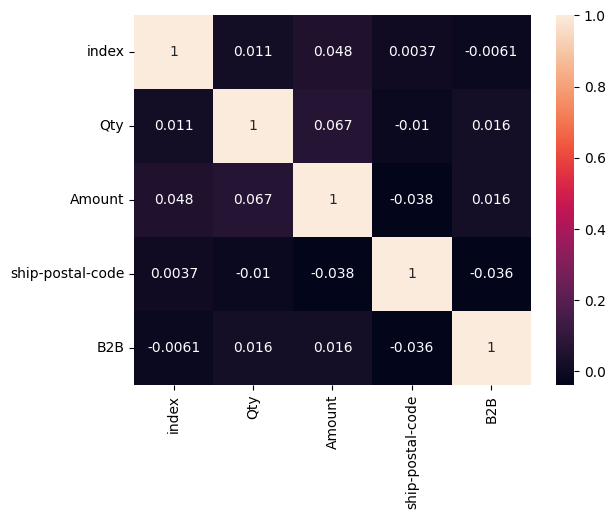

In [67]:
sns.heatmap(df.corr(numeric_only=True), annot=True)